Question 3: Parabolic Equations:

In [46]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def BC1(t):
    f=1+10*t
    return f

def IC(x):
    h=np.sin(x)
    return h

D = 1     # Diffusion constant
L = 10         # Length of domain
dx = 0.01     # Grid discretization
dt = 1.0e-5   # Timestep
rt = D*dt/(dx**2) 
T_max = 1     # End time

N=int(L/dx)+1
M=int(T_max/dt)+1
x=np.linspace(0,L,N)
t=np.linspace(0,T_max,M)

u=np.zeros((N,M))
u[:,0]=IC(x)


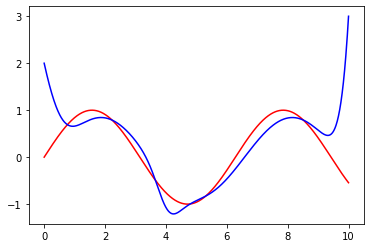

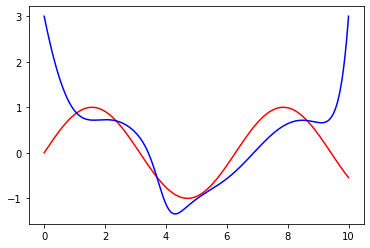

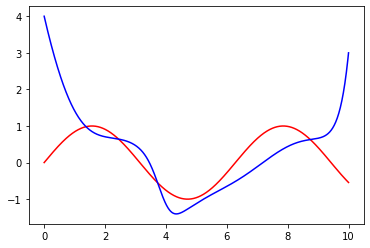

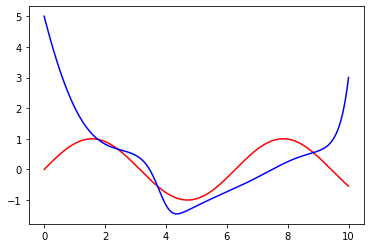

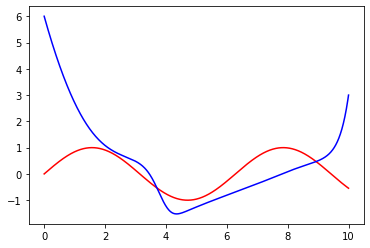

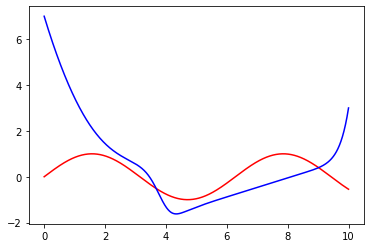

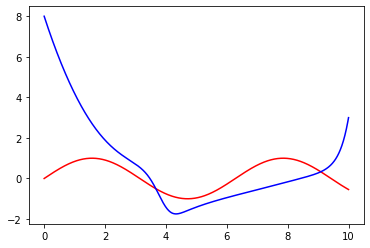

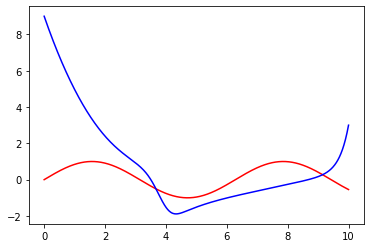

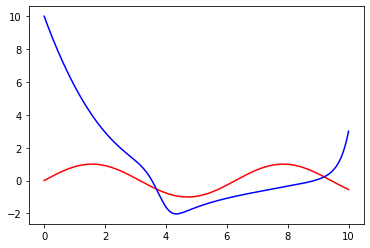

In [47]:
for n in range(0,M-1):
    #BC1
    u[0,n+1]=BC1(t[n+1])
    #BC2 BD2(341)
    u[-1,n+1]=(-D/10)*((-3*u[-1,n+1]+4*(u[-2,n+1])-u[-3,n+1])/(2*dx))+3
    for i in range(1,N-1): 
        if (n==0):
            u[i,1]=IC(x[i])
        else:
            u[i,n+1]=u[i,n]+rt*(u[i-1,n]-2*u[i,n]+u[i+1,n])-(3*dt/(2*dx))*(u[i+1,n]-u[i-1,n])-dt*(0.7*u[i,n]+10*(1+t[n]**2)*np.exp(-7*(x[i]-4)**2))
    if (np.mod(n+1,10000)==0):
        plt.figure()
        plt.plot(x,u[:,0],'-r',x,u[:,n+1],'-b')
        plt.show()

Question 4: Impilicit Method

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def IC(x):
    h=np.heaviside(x-0.4,1)-np.heaviside(x-0.6,1)
    return h

D = 1     # Diffusion constant
L = 1         # Length of domain
dx = 1.0e-3     # Grid discretization
dt = 1.0e-3   # Timestep
rt = D*dt/(dx**2) 
T_max = 2     # End time
print(rt)
N=int(L/dx)+1
M=int(T_max/dt)+1
x=np.linspace(0,L,N)
t=np.linspace(0,T_max,M)

AM=(1+2*rt)*np.diag(np.ones(N))
AR=-rt*np.diag(np.ones(N-1),1)
AL=-rt*np.diag(np.ones(N-1),-1)

A=AM+AR+AL

A[0,0]=1.
A[-1,-1]=1.
A[0,1]=0.
A[-1,-2]=0.

u=np.zeros((N,M))
u[:,0]=IC(x)

p=int((M-1)/10);



1000.0000000000001


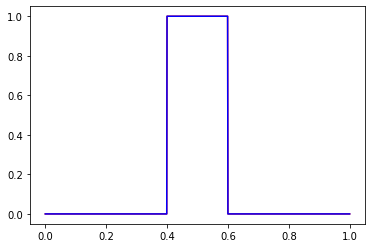

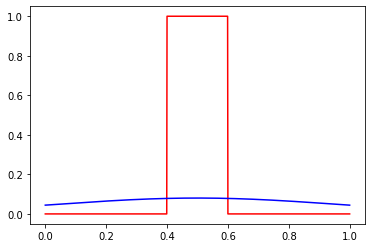

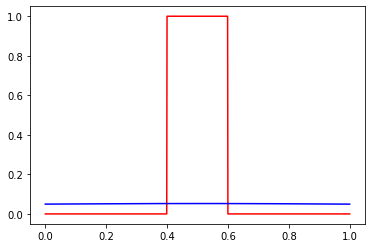

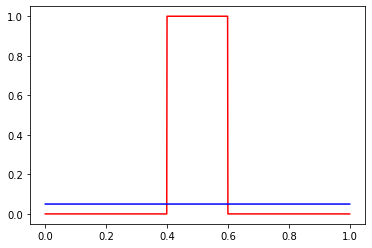

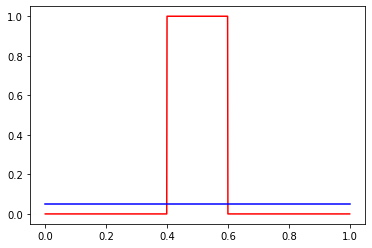

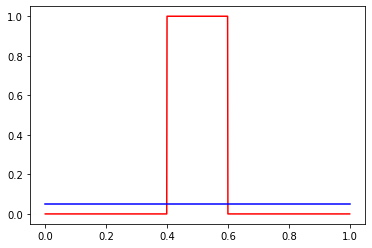

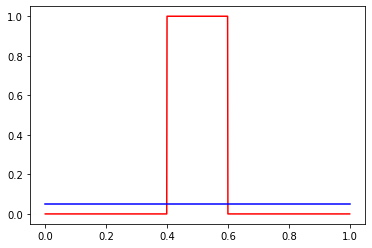

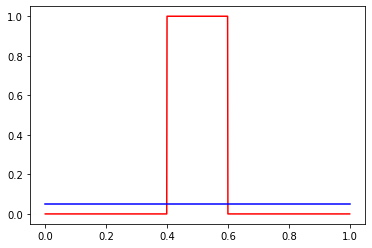

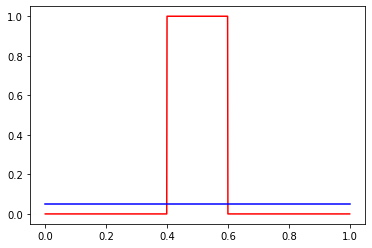

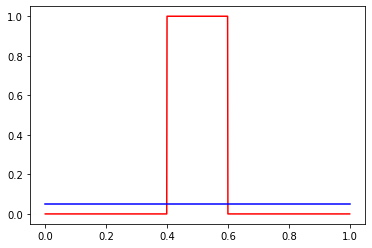

In [61]:
for j in range(0,M-1):
    b=u[:,j]
    b[0]=(4*b[1]-b[2])/3
    b[-1]=(4*b[-2]-b[-3])/3
    u[:,j+1]=np.linalg.solve(A,b)
    if (np.mod(j,p)==0):
        plt.figure()
        plt.plot(x,u[:,0],'-r',x,u[:,j],'-b')  
        plt.show()